## Convolutional Neural Network



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing


# Part 1


In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = '/content/drive/MyDrive/Colab Notebooks/Cats_and_Dogs/train'
val =   '/content/drive/MyDrive/Colab Notebooks/Cats_and_Dogs/val'
test =  '/content/drive/MyDrive/Colab Notebooks/Cats_and_Dogs/test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size
nb_validation_samples = 1500
# test set size
nb_test_samples = 1500

In [ ]:
#Prepare the data
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


## 1. Build and fit CNN with 3 convolutional layers for binary classification

In [ ]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu')) #+Relu

# 4:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5:  +Convolutional
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu')) #+Relu

# 6:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# 7:  +Flattening
model.add(Flatten())

# 8:  +Dense
model.add(Dense(64))
model.add(Activation('relu'))#     +ReLu
# 9:  +Dropout
model.add(Dropout(0.5))

# 10: +Dense
model.add(Dense(1))
model.add(Activation('sigmoid'))#     +Sigmoid



In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-9-731ffb86ca7c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
312/312 [==============================] - 69s 219ms/step - loss: 0.1351 - accuracy: 0.9452 - val_loss: 0.4405 - val_accuracy: 0.8410
Epoch 2/10
312/312 [==============================] - 68s 216ms/step - loss: 0.1133 - accuracy: 0.9555 - val_loss: 0.4211 - val_accuracy: 0.8621
Epoch 3/10
312/312 [==============================] - 66s 212ms/step - loss: 0.0999 - accuracy: 0.9606 - val_loss: 0.4855 - val_accuracy: 0.8438
Epoch 4/10
312/312 [==============================] - 65s 210ms/step - loss: 0.0832 - accuracy: 0.9668 - val_loss: 0.5536 - val_accuracy: 0.8410
Epoch 5/10
312/312 [==============================] - 67s 216ms/step - loss: 0.0796 - accuracy: 0.9697 - val_loss: 0.6163 - val_accuracy: 0.8404
Epoch 6/10
312/312 [==============================] - 67s 214ms/step - loss: 0.0734 - accuracy: 0.9713 - val_loss: 0.6529 - val_accuracy: 0.8526
Epoch 7/10
312/312 [==============================] - 66s 212ms/step - loss: 0.0649 - accuracy: 0.9757 - val_loss: 0.7062 - val_ac

## 2. Evaluate accuracy on test data

In [ ]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

<ipython-input-10-dca356712a64>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 83.63%


## 3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)


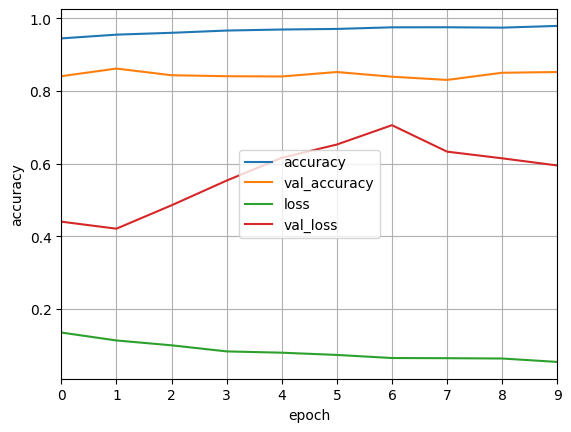

In [ ]:

# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlim(0,9)
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()


# Part 2

## 1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.

In [ ]:
vgg16_net = VGG16(weights='imagenet',
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
# add layers to VGG16:

model1 = Sequential()
model1.add(vgg16_net)

# + flattening
model1.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model1.add(Dense(256))
# + ReLu
model1.add(Activation('relu'))
# + Dropout
model1.add(Dropout(0.5))
# + Dense layer with 1 neuron
model1.add(Dense(1))
# + sigmoid
model1.add(Activation('sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
 activation_6 (Activation)   (None, 1)                

In [ ]:
model1.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

In [ ]:
history1 = model1.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-15-49de8db34dd0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model1.fit_generator(


Epoch 1/10
312/312 [==============================] - 82s 242ms/step - loss: 0.2956 - accuracy: 0.8730 - val_loss: 0.2275 - val_accuracy: 0.9117
Epoch 2/10
312/312 [==============================] - 72s 231ms/step - loss: 0.2311 - accuracy: 0.9027 - val_loss: 0.2052 - val_accuracy: 0.9253
Epoch 3/10
312/312 [==============================] - 71s 228ms/step - loss: 0.2086 - accuracy: 0.9117 - val_loss: 0.2280 - val_accuracy: 0.8988
Epoch 4/10
312/312 [==============================] - 70s 224ms/step - loss: 0.1894 - accuracy: 0.9206 - val_loss: 0.2432 - val_accuracy: 0.9015
Epoch 5/10
312/312 [==============================] - 69s 220ms/step - loss: 0.1804 - accuracy: 0.9251 - val_loss: 0.2085 - val_accuracy: 0.9239
Epoch 6/10
312/312 [==============================] - 69s 222ms/step - loss: 0.1667 - accuracy: 0.9303 - val_loss: 0.2182 - val_accuracy: 0.9171
Epoch 7/10
312/312 [==============================] - 69s 222ms/step - loss: 0.1574 - accuracy: 0.9351 - val_loss: 0.2144 - val_ac

## 2. Build and fit Transfer Learning model using pre-trained ResNet50-model weights from keras application.

In [ ]:
# Downloading the ResNet weights
from keras.applications import ResNet50
resnet_net = ResNet50(weights='imagenet',
                  include_top=False,      #
                  input_shape=(150, 150, 3))
resnet_net.trainable = False

resnet_net.summary()

In [ ]:
# add layers to ResNet50:

model2 = Sequential()
model2.add(resnet_net)

# + flattening
model2.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model2.add(Dense(256))
# + ReLu
model2.add(Activation('relu'))
# + Dropout
model2.add(Dropout(0.5))
# + Dense layer with 1 neuron
model2.add(Dense(1))
# + sigmoid
model2.add(Activation('sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               13107456  
                                                                 
 activation_7 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
 activation_8 (Activation)   (None, 1)                

In [ ]:
model2.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

In [ ]:
# 10 epochs
history2  = model2.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

<ipython-input-21-b6a6067a8271>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2  = model2.fit_generator(


Epoch 1/10
312/312 [==============================] - 84s 245ms/step - loss: 0.7493 - accuracy: 0.5247 - val_loss: 0.6791 - val_accuracy: 0.4939
Epoch 2/10
312/312 [==============================] - 71s 227ms/step - loss: 0.6825 - accuracy: 0.5483 - val_loss: 0.6887 - val_accuracy: 0.5149
Epoch 3/10
312/312 [==============================] - 73s 234ms/step - loss: 0.6769 - accuracy: 0.5555 - val_loss: 0.6617 - val_accuracy: 0.6427
Epoch 4/10
312/312 [==============================] - 70s 225ms/step - loss: 0.6594 - accuracy: 0.6007 - val_loss: 0.6305 - val_accuracy: 0.6658
Epoch 5/10
312/312 [==============================] - 70s 225ms/step - loss: 0.6530 - accuracy: 0.6081 - val_loss: 0.6256 - val_accuracy: 0.6943
Epoch 6/10
312/312 [==============================] - 71s 227ms/step - loss: 0.6517 - accuracy: 0.6100 - val_loss: 0.6244 - val_accuracy: 0.6821
Epoch 7/10
312/312 [==============================] - 70s 225ms/step - loss: 0.6499 - accuracy: 0.6079 - val_loss: 0.6144 - val_ac

## 3. Evaluate accuracy on test data for p.1 and p.2

In [ ]:
# VGG16 - 10 epochs
scores = model1.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

<ipython-input-22-a54ee3ccf49e>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model1.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 91.17%


In [ ]:
# ResNet - 10 epochs
scores = model2.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

<ipython-input-23-29b775825d45>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model2.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 69.90%


## 4. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

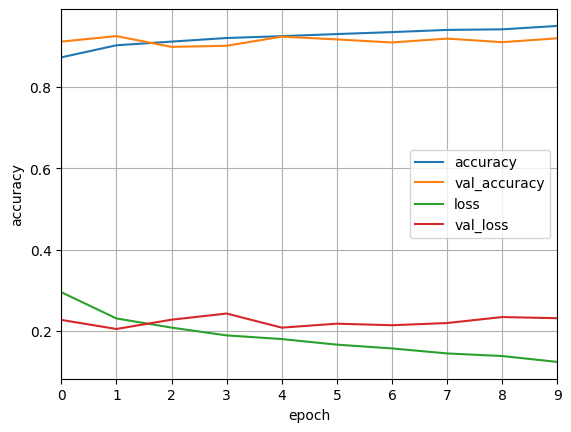

In [ ]:
# VGG16
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.xlim(0,9)
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()


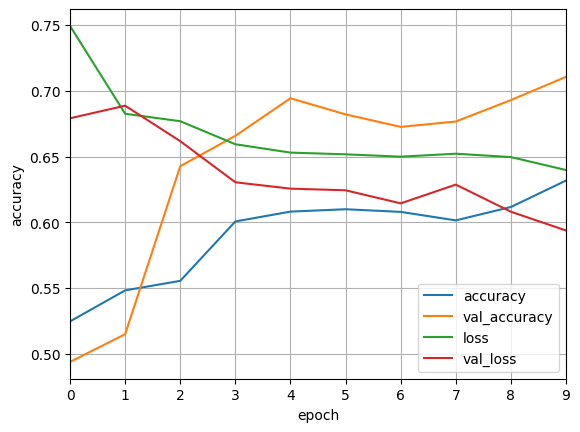

In [ ]:
# ResNet
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlim(0,9)
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

## 5. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

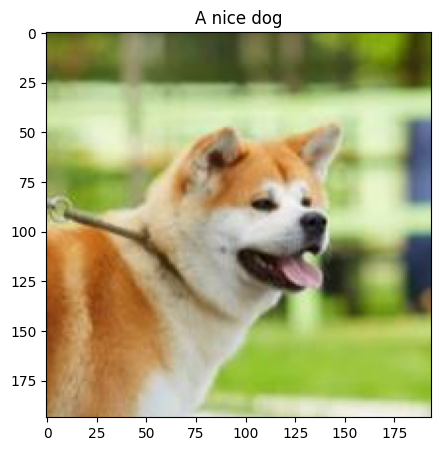

1/1 [==============================] - 0s 37ms/step
Predicted probability: 1.0
Predicted class: dog


In [ ]:
# VGG16 prediction on custom image
path = 'dog.jpg'
img_dog = mpimg.imread(path)
plt.figure(figsize = (5,5))
plt.title('A nice dog')
plt.imshow(img_dog)
plt.show()


from tensorflow.keras.applications.vgg16 import preprocess_input

img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=(150, 150))

y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)
y = preprocess_input(y)

predictions = model1.predict(y)

print("Predicted probability:", predictions[0][0])
predicted_class = 'dog' if predictions[0][0] > 0.5 else 'cat'
print("Predicted class:", predicted_class)

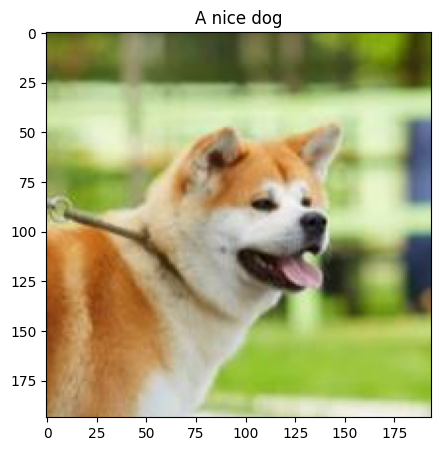

1/1 [==============================] - 0s 23ms/step
Predicted probability: 1.0
Predicted class: dog


In [ ]:
# ResNet50 prediction on custom image
path = 'dog.jpg'
img_dog = mpimg.imread(path)
plt.figure(figsize = (5,5))
plt.title('A nice dog')
plt.imshow(img_dog)
plt.show()


from tensorflow.keras.applications.resnet50 import preprocess_input

img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=(150, 150))

y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)
y = preprocess_input(y)

predictions = model2.predict(y)

print("Predicted probability:", predictions[0][0])
predicted_class = 'dog' if predictions[0][0] > 0.5 else 'cat'
print("Predicted class:", predicted_class)

# Conclusion

In the laboratory work I built several models to predict cats and dogs: a CNN with 3 convolutional layers, pre-trained VGG16 and ResNet50.
Pre-trained VGG16 showed the best accuracy score on test sample (91%), however pre-trained Resnet50 performed to worst (70%).3-layer CNN also performed well (84%).

Probably the deep architecture of ResNet may not be necessary for simpler image recognition tasks like distinguishing between cats and dogs.

Pre-trained  models were also tested on custom dog image, and both results were correct.